In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# Machine Learning metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


## Task 1: Import packages and Load data


# Merge 12-month data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của thư mục chứa các file CSV
url = 'https://github.com/boringPpl/Sales-Reporting/tree/main/data'

# Gửi yêu cầu đến URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Tìm tất cả các đường dẫn tới các file CSV
csv_files = []
for link in soup.find_all('a', href=True):
    if link['href'].endswith('.csv'):
        if link['href'] not in csv_files:
          csv_files.append(link['href'])
# Base URL để tải các file CSV
base_url = 'https://raw.githubusercontent.com/boringPpl/Sales-Reporting/main/data/'

# Tạo danh sách các DataFrame
frames = []
all_length = []

# Tải và đọc các file CSV
for file in csv_files:
    file_url = base_url + file.split('/')[-1]
    df1 = pd.read_csv(file_url)
    frames.append(df1)
    length_1month = len(df1.index)
    all_length.append(length_1month)

if frames:
    # Kết hợp tất cả các DataFrame thành một DataFrame duy nhất
    result = pd.concat(frames, ignore_index=True)

    # Lưu DataFrame kết quả thành file CSV
    result.to_csv('annualSales2019.csv', index=False)
    print("File annualSales2019.csv đã được tạo thành công.")
else:
    print("Không có file CSV hợp lệ để kết hợp.")


File annualSales2019.csv đã được tạo thành công.


## Task 2: Clean and Preprocess data

In [ ]:
df = pd.read_csv('/content/annualSales2019.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task 2.2: Add 'Month' column

In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Task 2.3: Get rid of 'NaN' and 'Or' value

In [ ]:
df.shape

(186850, 7)

In [ ]:
for i in df.columns:
  percentage = round(df[i].isnull().sum() / len(df) * 100,2)
  print(f'> {i.ljust(20)} total_null: {str(df[i].isnull().sum()).ljust(10)} percentage: {percentage}%')

> Order ID             total_null: 545        percentage: 0.29%
> Product              total_null: 545        percentage: 0.29%
> Quantity Ordered     total_null: 545        percentage: 0.29%
> Price Each           total_null: 545        percentage: 0.29%
> Order Date           total_null: 545        percentage: 0.29%
> Purchase Address     total_null: 545        percentage: 0.29%
> Month                total_null: 545        percentage: 0.29%


In [ ]:
df['Month'].unique()

array(['01', nan, 'Or', '02', '10', '11', '12', '03', '04', '05', '06',
       '07', '08', '09'], dtype=object)

In [ ]:
# Vì giá trị null chiểm tỉ lệ rất nhỏ trong bộ dữ liệu vì thế tôi sẽ xóa chúng
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0


## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

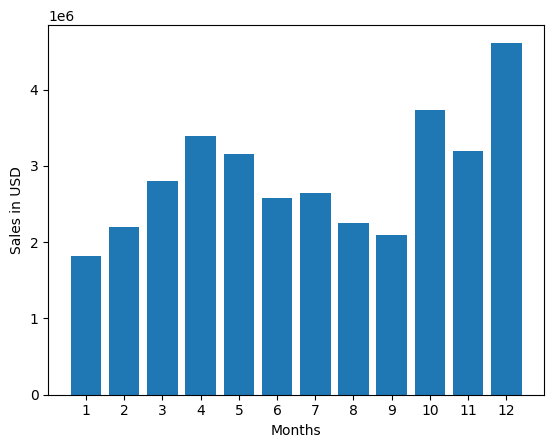

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
df.info()
df.to_csv('annualSales2019.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int8   
 3   Price Each        185950 non-null  float32
 4   Sales             185950 non-null  float32
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  object 
dtypes: float32(2), int8(1), object(5)
memory usage: 10.1+ MB


### Task 3.2: What city has the best sales?

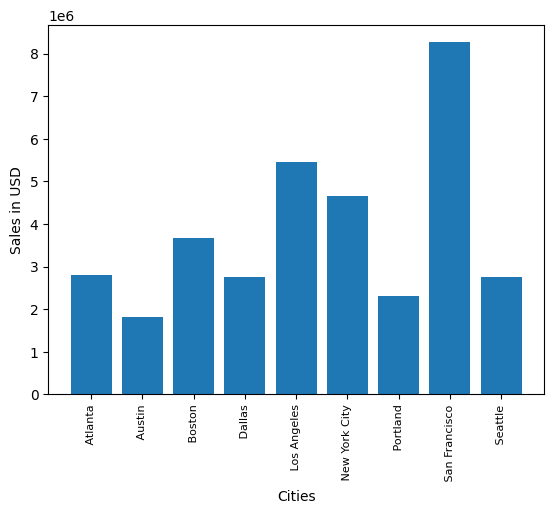

In [ ]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

<ipython-input-14-c442410627e0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


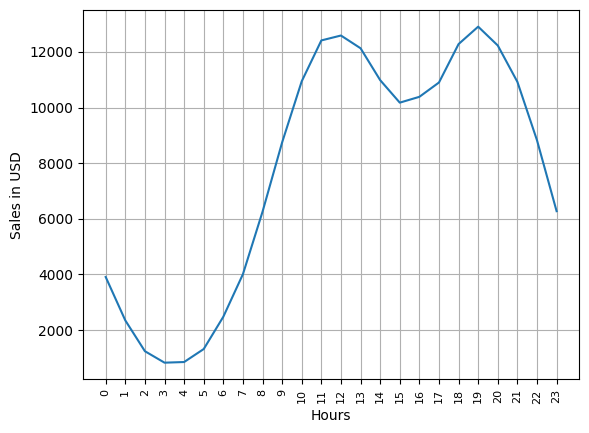

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.4: What products are most often sold together?

In [ ]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [ ]:
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

<ipython-input-16-86d3c3653bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [ ]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

,count
All Products,
"iPhone, Lightning Charging Cable",882
"Google Phone, USB-C Charging Cable",856
"iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones",303
"iPhone, Apple Airpods Headphones",286
"Google Phone, Bose SoundSport Headphones",161
"Vareebadd Phone, Wired Headphones",104
"Google Phone, USB-C Charging Cable, Wired Headphones",77


### Task 3.5: What product sold the most? Why do you think it sold the most?

<ipython-input-18-504eb6b75e66>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


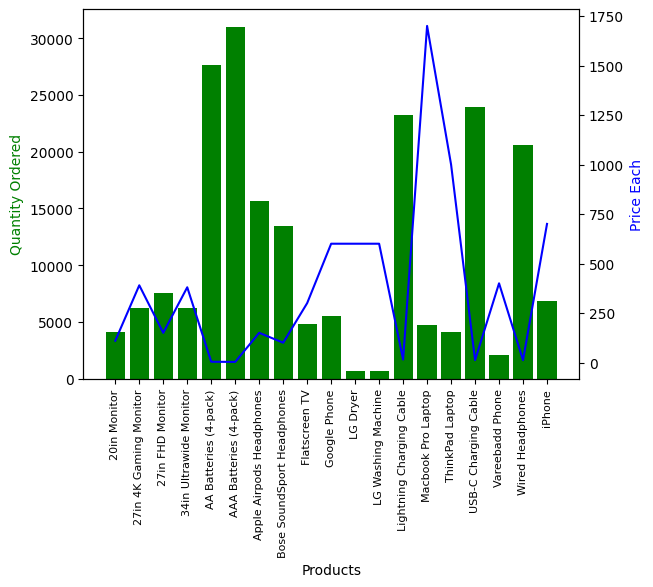

In [ ]:
# Đảm bảo cột 'Quantity Ordered' và 'Price Each' có kiểu dữ liệu số
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Loại bỏ các hàng có giá trị NaN sau khi chuyển đổi dữ liệu
df.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Nhóm theo sản phẩm và tính tổng số lượng đặt hàng và giá trung bình
all_products = df.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

Xây dựng mô hình hồi quy tuyến tính


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [ ]:
#Thư viện dùng để tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder

# Đổi các thuộc tính từ dạng định danh (object) về dạng số
lb_make =LabelEncoder()
#Biến đổi các biến phân loại
df["Product"] = lb_make.fit_transform(df["Product"])
df["City"] = lb_make.fit_transform(df["City"])

# Tạo thêm cột year và day
df['Day'] = df['Order Date'].dt.day
cols = df.columns.tolist()# Get the column names
cols.remove('Month')# duy chuyển cột month về cuối để tiện cho việc nhập số liệu để dự đoán
cols.append('Month')
df = df[cols]
df['Year'] = df['Order Date'].dt.year


<ipython-input-20-7744acf99398>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date'].dt.year


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hours,Day,Month,Year
0,141234,18,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2,21,22,01,2019
1,141235,12,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",6,14,28,01,2019
2,141236,17,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",7,13,17,01,2019
3,141237,2,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",4,20,5,01,2019
4,141238,17,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,25,01,2019


In [ ]:
pred_df = df.copy()
pred_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hours,Day,Month,Year
0,141234,18,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2,21,22,01,2019
1,141235,12,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",6,14,28,01,2019
2,141236,17,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",7,13,17,01,2019
3,141237,2,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",4,20,5,01,2019
4,141238,17,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,25,01,2019


In [ ]:
pred_df.shape

(185950, 12)

In [ ]:
pred_df.drop(['Order ID','Order Date','Purchase Address','Hours','Day',],axis=1,inplace=True)
pred_df.head()

,Product,Quantity Ordered,Price Each,Sales,City,Month,Year
0,18,1,700.000000,700.000000,2,01,2019
1,12,1,14.950000,14.950000,6,01,2019
2,17,2,11.990000,23.980000,7,01,2019
3,2,1,149.990005,149.990005,4,01,2019
4,17,1,11.990000,11.990000,1,01,2019


In [ ]:
pred_df.shape

(185950, 7)

In [ ]:
grouped_df = pred_df.groupby(['Product', 'Year','Month','City']).agg({
    'Price Each': 'sum',
    'Quantity Ordered': 'sum'
}).reset_index()
grouped_df.rename(columns={'Price Each': 'Total Sales'}, inplace=True)
moving_column = grouped_df.pop('Total Sales')
grouped_df.insert(4, 'Total Sales', moving_column)
grouped_df.shape

(2075, 6)

In [ ]:
grouped_df.head()

,Product,Year,Month,City,Total Sales,Quantity Ordered
0,0,2019,01,0,1539.859985,15
1,0,2019,01,1,1209.890015,11
2,0,2019,01,2,2309.790039,21
3,0,2019,01,3,2419.780029,22
4,0,2019,01,4,3629.669922,34


In [ ]:
X = grouped_df.drop(['Quantity Ordered','Total Sales'],axis=1)
y =grouped_df['Quantity Ordered']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Printing info on X and y
X_train.shape, y_test.shape

((1660, 4), (415,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Tạo mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_Linear = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_Linear)
mse = mean_squared_error(y_test, y_pred_Linear)
r2 = r2_score(y_test, y_pred_Linear)

print(f"LinearRegression Regression Mean Squared Error: {mse:.2f}")
print(f"LinearRegression Mean Absolute Error: {mae:.2f}")
print(f"LinearRegression R-squared: {r2:.2f}")

LinearRegression Regression Mean Squared Error: 14269.88
LinearRegression Mean Absolute Error: 82.50
LinearRegression R-squared: 0.02


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Machine Learning metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Xây dựng mô hình rừng ngẫu nhiên
model_RandomFores = RandomForestRegressor(n_estimators=20, random_state=0)
model_RandomFores.fit(X_train,y_train)
# Dự đoán
pred_y_RandomForest = model_RandomFores.predict(X_test)
mse = mean_squared_error(y_test, pred_y_RandomForest)
mae = mean_absolute_error(y_test, pred_y_RandomForest)
r2 = r2_score(y_test, pred_y_RandomForest)
print(f"RandomForestn Mean Squared Error: {mse:.2f}")
print(f"RandomForest Mean Absolute Error: {mae:.2f}")
print(f"RandomForest R-squared: {r2:.2f}")

RandomForestn Mean Squared Error: 1204.55
RandomForest Mean Absolute Error: 18.76
RandomForest R-squared: 0.92


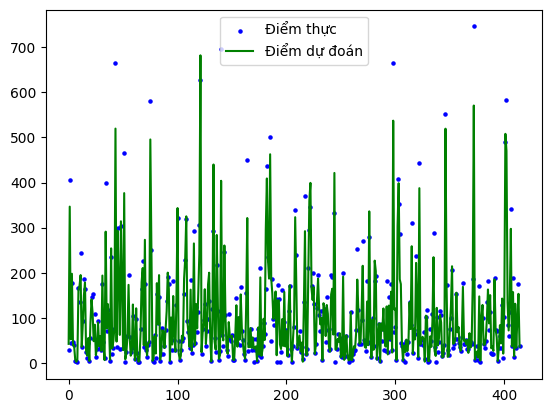

In [ ]:
#Trực quan hóa mô hình dự đoán
x_ax=range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Điểm thực")
plt.plot(x_ax, pred_y_RandomForest, lw=1.5, color="green", label="Điểm dự đoán")
plt.legend()
plt.show()

#Ridge Regression

In [ ]:

#Tạo mô hình ridge
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, ridge_predictions)
mae = mean_absolute_error(y_test, ridge_predictions)
r2 = r2_score(y_test, ridge_predictions)

print(f"Ridge Regression Mean Squared Error: {mse:.2f}")
print(f"Ridge Regression Mean Absolute Error: {mae:.2f}")
print(f"Ridge Regression R-squared: {r2:.2f}")

Ridge Regression Mean Squared Error: 14271.45
Ridge Regression Mean Absolute Error: 82.47
Ridge Regression R-squared: 0.02


In [ ]:
# Initialize CatBoost model
catboost_model = CatBoostRegressor(iterations=10,depth = 8 , learning_rate = 0.1)
# Fit the model with the best hyperparameters
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
# Dự đoán
mse = mean_squared_error(y_test, y_pred_catboost)
mae = mean_absolute_error(y_test, y_pred_catboost)
r2 = r2_score(y_test, y_pred_catboost)
print(f"RandomForestn Mean Squared Error: {mse:.2f}")
print(f"RandomForest Mean Absolute Error: {mae:.2f}")
print(f"RandomForest R-squared: {r2:.2f}")

0:	learn: 112.4428278	total: 47ms	remaining: 423ms
1:	learn: 108.2815330	total: 48.4ms	remaining: 193ms
2:	learn: 104.5651122	total: 49.5ms	remaining: 115ms
3:	learn: 100.5323414	total: 50.2ms	remaining: 75.3ms
4:	learn: 98.0195554	total: 51.2ms	remaining: 51.2ms
5:	learn: 94.1936425	total: 52.2ms	remaining: 34.8ms
6:	learn: 90.9506920	total: 53.2ms	remaining: 22.8ms
7:	learn: 88.2767743	total: 53.7ms	remaining: 13.4ms
8:	learn: 85.0796340	total: 54.5ms	remaining: 6.05ms
9:	learn: 82.8805143	total: 55.6ms	remaining: 0us
RandomForestn Mean Squared Error: 7675.29
RandomForest Mean Absolute Error: 57.78
RandomForest R-squared: 0.47


In [ ]:
# Tạo mô hình Lasso
lasso_model = Lasso(alpha=1.0)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
r2 = r2_score(y_test, lasso_predictions)

print(f"Lasso Regression Mean Squared Error: {mse:.2f}")
print(f"Lasso Regression Mean Absolute Error: {mae:.2f}")
print(f"Lasso Regression R-squared: {r2:.2f}")

Lasso Regression Mean Squared Error: 14378.20
Lasso Regression Mean Absolute Error: 82.84
Lasso Regression R-squared: 0.01


In [ ]:
#  Select random 10 rows
random_rows =grouped_df.sample(10, random_state=42)
#  Use trained models to predict Chemical Count
random_rows_X = random_rows.drop(['Quantity Ordered','Total Sales'], axis=1) # Pass labels to drop as a list
# Linear Regression
lr_predictions = model.predict(random_rows_X)
# Lasso Regression
lasso_predictions = lasso_model.predict(random_rows_X)

# Ridge Regression
ridge_predictions = ridge_model.predict(random_rows_X)

# Random Forest Regression
rf_predictions = model_RandomFores.predict(random_rows_X)

# CatBoost Regression
catboost_predictions = catboost_model.predict(random_rows_X)

#Create a table
prediction_table = pd.DataFrame({
    'Quantity_Ordered': random_rows['Quantity Ordered'].values, # Access 'Quantity Ordered' separately
    'Product': random_rows['Product'].values, # Access 'Total Sales' separately
    'City': random_rows['City'].values, # Access 'Total Sales' separately

    # 'Linear_Regression': lr_predictions,
    # 'Lasso_Regression': lasso_predictions,
    # 'Ridge_Regression': ridge_predictions,
    'RandomForest_Regression': rf_predictions,
    # 'CatBoost_Regression': catboost_predictions
})

# Display the prediction table
print(prediction_table)

   Quantity_Ordered  Product  City  RandomForest_Regression
0                28        8     5                    42.25
1               405        4     7                   346.55
2                44       18     3                    52.45
3               177       12     2                   197.70
4                47        2     8                    39.20
5                39        8     2                    38.85
6                 4       10     2                     8.20
7                 4       10     3                     2.60
8                 3       10     0                     6.75
9               167        5     0                   162.20


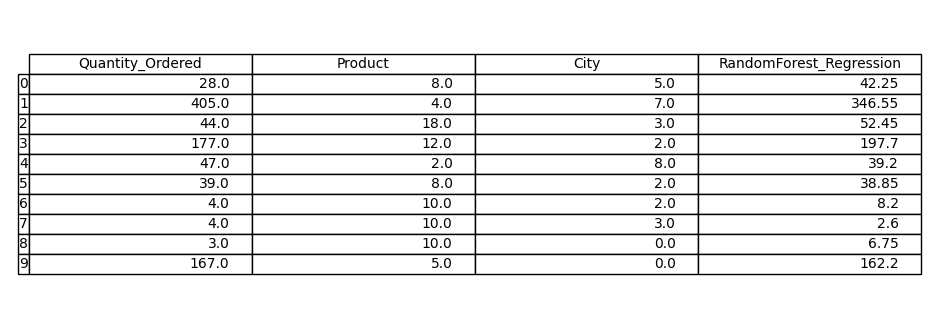

In [ ]:
from pandas.plotting import table
# Plotting the table
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')  # Turn off the axis
# Create a table and add it to the plot
tab = table(ax, prediction_table, loc='center', colWidths=[0.2]*len(prediction_table.columns))
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)  # Adjust the table size

# Display the plot
plt.show()